In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Visualize Culane

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# File paths
image_path = "/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg"
lines_path = "/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.lines.txt"

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read lane annotation file
with open(lines_path, 'r') as f:
    lines = f.readlines()

# Plot the lane points on the image
for line in lines:
    points = []
    for p in line.strip().split(';'):
        coords = p.split()
        if len(coords) >= 2:  # Ensure there are at least two values (x, y)
            try:
                x, y = float(coords[0]), float(coords[1])  # Convert to float
                points.append((int(x), int(y)))  # Convert to int
            except ValueError:
                continue  # Skip any malformed entries

    points = np.array(points, dtype=np.int32)

    # Draw the lane lines if there are enough valid points
    if len(points) > 1:
        for i in range(len(points) - 1):
            cv2.line(image, tuple(points[i]), tuple(points[i + 1]), (255, 0, 0), 2)  # Blue color lane
# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:


# List files in the dataset directory to find the correct path
base_path = '/kaggle/input/culane/driver_161_90frame'
for root, dirs, files in os.walk(base_path):
    print(root, dirs, files)
    break  # Remove this to list all files, but it might be very verbose

# Update the file path based on the directory structure
correct_image_path = '/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg'
image = cv2.imread(correct_image_path)

# Ensure the image is read correctly
if image is None:
    print("Error: Could not read the image.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Base path to the dataset
base_path = '/kaggle/input/culane'

# Function to list files in the dataset directory
def list_files_in_directory(base_path):
    for root, dirs, files in os.walk(base_path):
        print("Directory:", root)
        print("Subdirectories:", dirs)
        print("Files:", files)
        print("-" * 50)
        # Remove this break to list all files and directories
        break

# List the directory contents
list_files_in_directory(base_path)

# Example: Manually update the file path based on the listed directory contents
correct_image_path = '/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg'  # Replace with actual path

# Load the image
image = cv2.imread(correct_image_path)

# Ensure the image is read correctly
if image is None:
    print(f"Error: Could not read the image at {correct_image_path}.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Base path to the dataset
base_path = '/kaggle/input/culane/driver_161_90frame'

# Function to list files in the dataset directory
def list_files_in_directory(base_path):
    for root, dirs, files in os.walk(base_path):
        print("Directory:", root)
        print("Subdirectories:", dirs)
        print("Files:", files)
        print("-" * 50)
        # Remove this break to list all files and directories
        break

# List the directory contents
list_files_in_directory(base_path)

# Example: Manually update the file path based on the listed directory contents
correct_image_path = '/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg'  # Replace with actual path

# Load the image
image = cv2.imread(correct_image_path)

# Ensure the image is read correctly
if image is None:
    print(f"Error: Could not read the image at {correct_image_path}.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Base path to the dataset
base_path = '/kaggle/input/culane/driver_161_90frame'
subdirectory = '/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4'  # Example subdirectory
subdirectory_path = os.path.join(base_path, subdirectory)

# Function to list files in the selected subdirectory
def list_files_in_directory(subdirectory_path):
    for root, dirs, files in os.walk(subdirectory_path):
        print("Directory:", root)
        print("Subdirectories:", dirs)
        print("Files:", files)
        print("-" * 50)
        # Remove this break to list all files and directories
        break

# List the subdirectory contents
list_files_in_directory(subdirectory_path)

# Example: Manually


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correct path to an image file
correct_image_path = '/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg'

# Load the image
image = cv2.imread(correct_image_path)

# Ensure the image is read correctly
if image is None:
    print(f"Error: Could not read the image at {correct_image_path}.")
else:
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(image_rgb)
    plt.title("Loaded Image")
    plt.axis('off')  # Hide axes
    plt.show()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def detect_lanes(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)
    
    # Define region of interest (ROI)
    mask = np.zeros_like(edges)
    height, width = edges.shape
    polygon = np.array([[
        (0, height),
        (width, height),
        (width//2, height//2)
    ]], dtype=np.int32)
    cv2.fillPoly(mask, polygon, 255)
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(masked_edges, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    
    # Draw detected lines on the original image
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    
    # Combine the line image with the original image
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    
    return result


In [ ]:
# Path to the directory containing video files
video_dir = '/kaggle/input/culane/driver_161_90frame/06030822_0756.MP4'

# Loop through each frame in the video
for filename in sorted(os.listdir(video_dir)):
    if filename.endswith('.jpg'):
        # Construct the full path to the image file
        image_path = os.path.join(video_dir, filename)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Detect lanes in the image
        lane_image = detect_lanes(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        # Display the image with detected lanes
        plt.figure(figsize=(12, 8))
        plt.imshow(lane_image)
        plt.axis('off')
        plt.title(f'Lane Detection: {filename}')
        plt.show()


In [ ]:
video_dir = '/kaggle/input/culane/driver_161_90frame/06030946_0784.MP4'

# Loop through each frame in the video
for filename in sorted(os.listdir(video_dir)):
    if filename.endswith('.jpg'):
        # Construct the full path to the image file
        image_path = os.path.join(video_dir, filename)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Detect lanes in the image
        lane_image = detect_lanes(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        # Display the image with detected lanes
        plt.figure(figsize=(12, 8))
        plt.imshow(lane_image)
        plt.axis('off')
        plt.title(f'Lane Detection: {filename}')
        plt.show()

SCNN

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import cv2
#experiment with single image and text file
img_file = "/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.jpg"
text_file = "/kaggle/input/culane/driver_161_90frame/06030819_0755.MP4/00000.lines.txt"

def remove_newlines(fname):
    data=[]
    coordinates =[]
    flist = open(fname).readlines()
    for s in flist:
        data.extend([d for d in s.rstrip('\n').split(" ")  if d!=''])
    
    data = np.array(data).astype(np.float32)
        
    for idx in range(0,len(data),2):
        coordinates.append(data[idx:idx+2])
    if(len(data)==0):
        return None , None  , 0 , 0
    
    else:

        mean_val = np.mean(data)
        std_val = np.std(data)
        return coordinates , data , mean_val  , std_val

In [3]:
from os import walk

img_files = []
label_data=[]
mean_array=[]
std_array = []
coordinate_list=[]
for dirpath, dirnames, filenames in walk("/kaggle/input/culane/driver_161_90frame"):
    for files in filenames :
        if(files.split(".")[-1]=="jpg"):
            txt_file = os.path.join(dirpath , files.split(".")[0]+str(".lines.txt") )
            coordinates , data , mean_val , std_val  = remove_newlines(txt_file)
            if(data is not None):
                img_files.append(os.path.join(dirpath,files))
                label_data.append( data )
                mean_array.append(mean_val)
                std_array.append(std_val)
                coordinate_list.append(coordinates)

In [ ]:
#plot the image with pth corrdinates
fig = plt.figure(figsize=(15,10))
def plot_data (image_file , coordinates):
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    for x , y in coordinates :
        cv2.circle(img_rgb,(int(float(x)), int(float(y)) ) , 5, (0,255,0), -1)
    plt.imshow(img_rgb)
    plt.show()
plot_data(img_files[0] , coordinate_list[0])

In [ ]:
import os
results=[]
with open("/kaggle/input/list-data/list/train_gt.txt") as f:
    for line in f :
        line = line.strip()
        data = line.split(" ")
        set1 = data[0].split(os.path.sep)[1:]
        if(set1[0] == "driver_161_90frame"):
            results.append(data)

In [ ]:
import cv2
data_set=[]
for data in results :
    exist=[int(x) for x in data[2:]]
    img_sep = data[0].split(os.path.sep)
    label_sep = data[1].split(os.path.sep)
    label_path = os.path.join("/kaggle/input/culane/driver_161_90frame_labels" , label_sep[-2], label_sep[-1])
    img_path= os.path.join("/kaggle/input/culane", img_sep[1] , img_sep[2] , img_sep[3])
    dict_culane={
        "img_path":img_path ,
        "label_path":label_path ,
        "exist":exist 
    }
    data_set.append(dict_culane)

In [ ]:
#define the dataset class
from torch.utils.data import Dataset
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
import numpy as np
class CreateDataSet(Dataset):
    def __init__(self,data_set , seed):
        self.data_set = data_set
        self.seed = torch.manual_seed(seed)
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((288,800)) ,
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225] )
        ])
        self.transform_label = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((288,800)) ,
        ])
        self.transform_exist = transforms.Compose([
            transforms.ToTensor()
        ])
    def __len__(self):
        return len(self.data_set)
    
    def __getitem__(self,index):
        data_item = self.data_set[index]
        #read the image data
        img = cv2.imread(data_item["img_path"])
        img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        img_rgb = self.transform(img_rgb)
        #read the label image
        label = cv2.imread(data_item["label_path"])[:,:,0]
        label = np.array(self.transform_label(label))
        if(len(data_item["exist"]) ==4 and label is not None):
            exists = np.array(data_item["exist"])
            
        else:
            exists = None
        exists = torch.from_numpy(exists)
        sample = {
            "data":img_rgb ,
            "target":label , 
            "exist":exists
        }
        
        return sample
train_data = CreateDataSet(data_set , 0)

size_train = len(train_data)
idx_list = list(range(size_train))
np.random.seed(0)
np.random.shuffle(idx_list)
train_val_split = 0.2
split_index = int(size_train * train_val_split)

#take the appropriate index values for train and val
train_idx = idx_list[split_index :]
val_idx = idx_list[:split_index]

train_sampler = SubsetRandomSampler(train_idx)
validate_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_data ,sampler=train_sampler , batch_size=16 )
valid_loader = DataLoader(train_data , sampler=validate_sampler , batch_size=16)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

In [9]:
class SCNN(nn.Module):
    def __init__(self , input_size , massage_kernel = 9 , pretrained=True):
        super(SCNN , self).__init__()
        self.pretrained = pretrained
        self.net_init(input_size , massage_kernel)
        self.scale_background = 0.4
        self.scale_seg = 1.0
        self.scale_exist = 0.1
        
        self.ce_loss = nn.CrossEntropyLoss(weight=torch.tensor([self.scale_background, 1, 1, 1, 1]))
        self.bce_loss = nn.BCELoss()
        
    def net_init(self,input_size , ms_ks):
        input_w , input_h = input_size
        self.fc_input_size = 5 * int(input_w/16) * int(input_h/16)
        self.backbone = models.vgg16_bn(pretrained=self.pretrained).features
        
        #replace the standard convs with dilated convs
        for i in [34 , 37 , 40]:
            conv = self.backbone._modules[str(i)]
            dilated_conv = nn.Conv2d(conv.in_channels , conv.out_channels  , conv.kernel_size , 
                                    stride=conv.stride , padding = tuple(p*2 for p in conv.padding) , 
                                    dilation=2 , bias = (conv.bias is not None))
            dilated_conv.load_state_dict(conv.state_dict())
            self.backbone._modules[str(i)] = dilated_conv
        self.backbone._modules.pop('33')
        self.backbone._modules.pop('43')
        
        #scnn unit
        self.layer1 = nn.Sequential(
            nn.Conv2d(512 , 1024 ,3 ,  padding=4 , dilation=4 , bias=False) , 
            nn.BatchNorm2d(1024) ,
            nn.ReLU() ,
            nn.Conv2d(1024 , 128 , 1 , bias=False),
            nn.ReLU()
        )
        
        # add message passing
        self.message_passing = nn.ModuleList()
        self.message_passing.add_module("up_down" , nn.Conv2d( 128 , 128 , (1 , ms_ks) , padding=(0,ms_ks//2) , bias=False     ))
        self.message_passing.add_module("down_up" , nn.Conv2d(128,128,(1,ms_ks) , padding=(0,ms_ks//2) , bias=False))
        self.message_passing.add_module('left_right',nn.Conv2d(128,128,(ms_ks , 1) , padding=(ms_ks//2 , 0) , bias=False))
        self.message_passing.add_module("right_left" , nn.Conv2d(128,128,(ms_ks , 1) , padding=(ms_ks//2 , 0) , bias=False))
        
        self.layer2 = nn.Sequential(
            nn.Dropout2d(0.1) ,
            nn.Conv2d(128,5,1)
        )
        self.layer3 = nn.Sequential(
            nn.Softmax(dim=1) ,
            #dimension reducion by 2
            nn.AvgPool2d(2,2) ,
        )
        
        self.fc = nn.Sequential(
            nn.Linear(self.fc_input_size , 128) ,
            nn.ReLU(),
            nn.Linear(128,4),
            nn.Sigmoid()
        )
        
    def message_passing_forward(self , x):
        Vertical=[True , True , False , False ]
        Reverse = [False , True , False , True]
        for ms_conv  , v , r in zip(self.message_passing , Vertical , Reverse):
            x = self.message_passing_once(x  , ms_conv , v , r)
        return x
    
    def message_passing_once(self,x  , ms_conv , vertical=True , reverse=True):
        nB , C , H , W = x.shape
        if vertical :
            slices =[  x[: , : , i : (i+1) , : ] for i in range(H)  ]
            dim=2
        else :
            slices = [ x[: , : , : , i: (i+1)] for i in range(W) ]
            dim=3
        if reverse :
            slices = slices[::-1]
            
        #then each slice convole with the conv layer and add to the previous layer
        out = [ slices[0]]
        for i in range(1, len(slices)):
            out.append(slices[i]+F.relu(ms_conv(out[i-1])))
            
        if reverse :
            out = out[::-1]
        #concatenate the tensors with the dimension
        return torch.cat(out , dim=dim)
    
    def forward(self,img , seg_img=None , exist_gt=None):
        #inference thorught the vgg16 backbone net
        x = self.backbone(img)
        x = self.layer1(x)
        x = self.message_passing_forward(x)
        x = self.layer2(x)
        
        #then to obtain the original image size need to upsample by 8
        seg_pred = F.interpolate(x  , scale_factor=8 , mode='bilinear' , align_corners=True)
        x = self.layer3(x)
        x = x.view(-1  , self.fc_input_size)
        exist_pred = self.fc(x)
        
        if seg_img is not None and exist_gt is not None:
            loss_seg = self.ce_loss(seg_pred , seg_img.long().squeeze(1))
            loss_exist = self.bce_loss(exist_pred.float() , exist_gt.float())
            #nned to pay more attention on the segmanetation loss and weight should be high
            loss = loss_seg * self.scale_seg + loss_exist * self.scale_exist
            
        else:
            loss_seg = torch.tensor(0,dtype=img.dtype , device=img.device)
            loss_exist = torch.tensor(0,dtype=img.dtype , device=img.device)
            loss = torch.tensor(0,dtype=img.dtype , device=img.device)
            
        return seg_pred , exist_pred , loss_seg , loss_exist , loss
        

In [10]:
#define the model
scnn_net = SCNN((800,288) , pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 152MB/s]  


In [11]:
#define the optimizer and lr optimizers
import torch.optim as optim
init_lr =  0.0001
max_lr = 0.01
optimizer = optim.SGD(scnn_net.parameters() , lr=init_lr)
#set the learining rate schedulers  scheduler need to be call for every batch operation
scheduler = optim.lr_scheduler.CyclicLR(optimizer , base_lr=init_lr , max_lr=max_lr)
device = "cuda:0" if torch.cuda.is_available() else 'cpu'
scnn_net.to(device)

SCNN(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 25

In [12]:
from collections import namedtuple
Label = namedtuple( 'Label' , [

        'name' ,

        'id' ,

        'color' ,
        ] )

In [13]:
labels = [
    #        lane mark             index       lane colour
    Label(  'background'            ,  0 ,     (0, 0,0)        ),
    Label(  'lane1'                 ,  1 ,     (255, 0,0)        ),
    Label(  'lane2'                 ,  2 ,     (150, 35,232)     ),
    Label(  'lane3'                 ,  3 ,     ( 0, 70, 70)      ),
    Label(  'lane4'                 ,  4 ,     (102,102,255)     )        
]

In [14]:
import matplotlib.pyplot as plt
import torch
import numpy as np 
import torch.nn.functional as F

# PyTroch version

SMOOTH = 1e-6
fig = plt.figure(figsize=(10,10))
def plot_results(ori_image , result_img , result_exist , label):
    print("Lane Line existing Probability : ",result_exist)
    plot_img(ori_image)
    plot_label(label)
    class_image = iou_result(result_img)
    convert(class_image)
    return class_image


def iou_result(outputs):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(0)
    outputs = outputs.reshape(5 ,288,800)
    outputs = torch.tensor(outputs , dtype=torch.float , device='cpu').unsqueeze(0)
    output_prob = F.log_softmax(outputs , dim=1)
    #take the argmax value in the dim 1
    output_class = torch.argmax(output_prob , dim=1)
    output_class = output_class.squeeze(0)
    return output_class # Or thresholded.mean() if you are interested in average across the batch


def convert(mask):
    mask = mask.numpy()
    height , width = mask.shape
    copy_img = np.zeros((height , width , 3) , dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            idx = mask[i][j]
            label = labels[idx]
            color = label.color
            copy_img[i][j]=color
    plt.title("Segment Mask")
    plt.imshow(copy_img)
    plt.show()

def plot_img(image):
    #unnormallize the image
    image = image.reshape(3, 288,800)
    image = np.transpose(image , (1,2,0))
    plt.title("Original Image")
    plt.imshow(image)
    plt.show()
    
def plot_label(image):
    #unnormallize the image
    image = image.reshape(288,800)
    plt.title("Original Image")
    plt.imshow(image)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

Epoch : 0 Mean Seg Loss : 0.48224 Mean Exist Loss : 0.684994 Mean Total Loss : 0.550738 
Lane Line existing Probability :  [[0.5233415  0.56439376 0.5563541  0.48563156]]


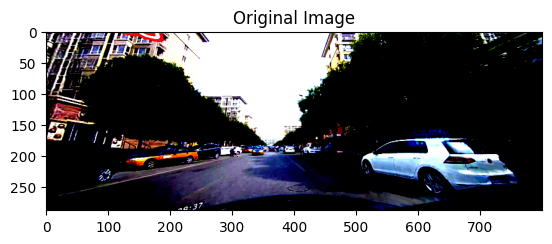

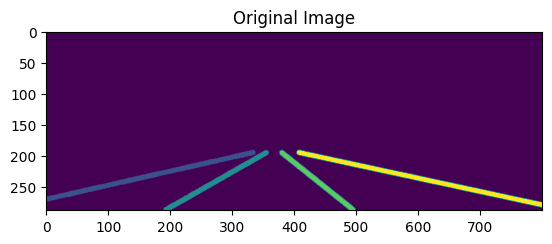

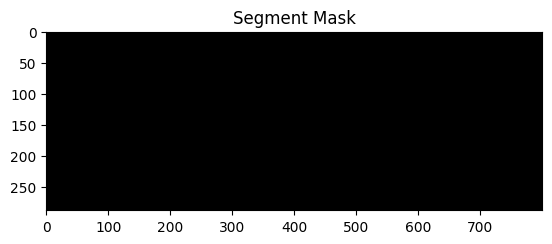

Epoch : 0 Mean Seg Loss : 0.37570 Mean Exist Loss : 0.649353 Mean Total Loss : 0.440633 
Lane Line existing Probability :  [[0.5419335  0.6935365  0.667004   0.51053447]]


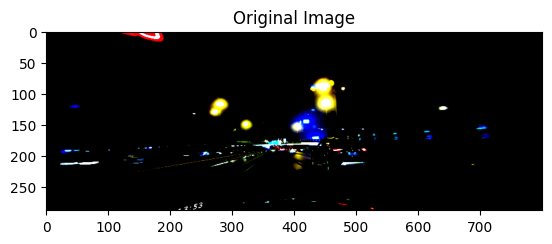

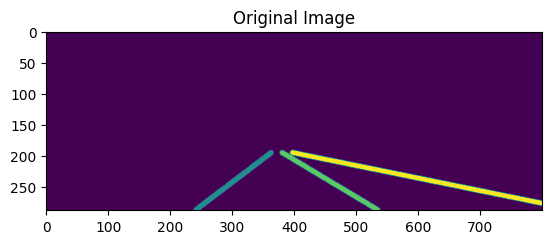

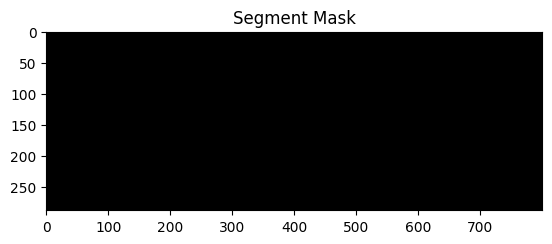

Epoch : 0 Mean Seg Loss : 0.33233 Mean Exist Loss : 0.619779 Mean Total Loss : 0.394306 
Lane Line existing Probability :  [[0.565961  0.7893173 0.7637563 0.5482669]]


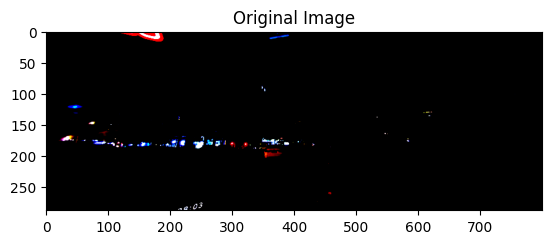

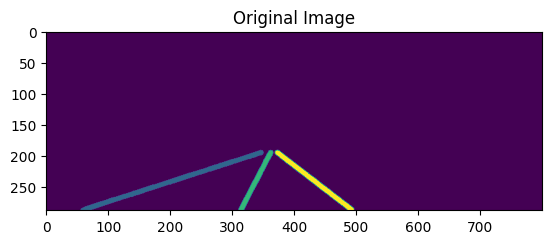

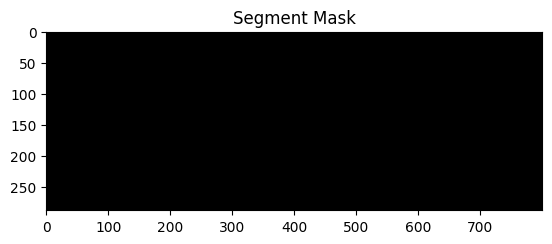

Epoch : 0 Mean Seg Loss : 0.30731 Mean Exist Loss : 0.596641 Mean Total Loss : 0.366974 
Lane Line existing Probability :  [[0.56452894 0.8380563  0.8244382  0.5829364 ]]


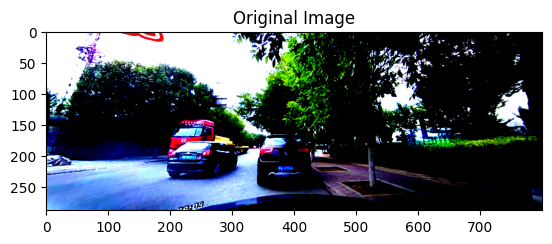

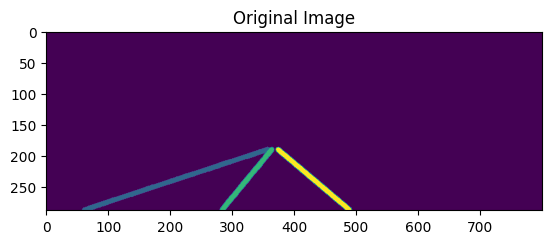

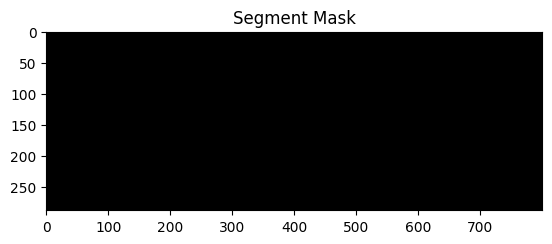

Epoch : 0 Mean Seg Loss : 0.28846 Mean Exist Loss : 0.578927 Mean Total Loss : 0.346354 
Lane Line existing Probability :  [[0.5539969  0.87774307 0.8709765  0.61938184]]


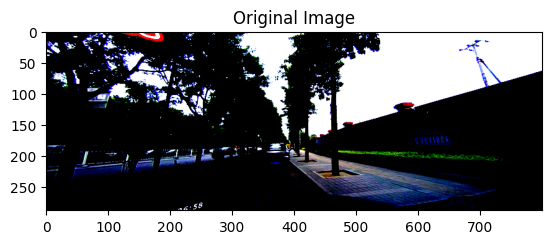

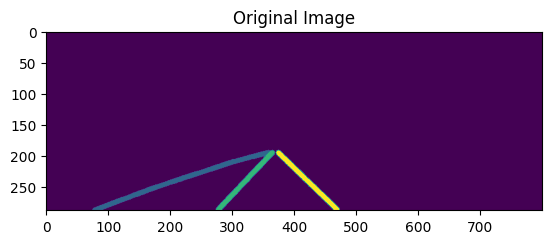

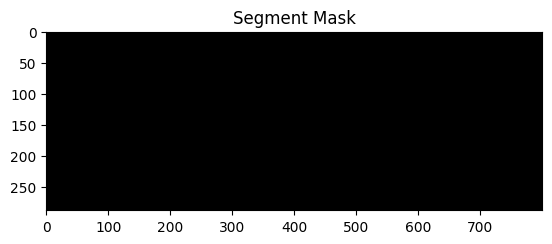

Epoch : 0 Mean Seg Loss : 0.27247 Mean Exist Loss : 0.567912 Mean Total Loss : 0.329263 
Lane Line existing Probability :  [[0.58150244 0.891201   0.88461363 0.6064129 ]]


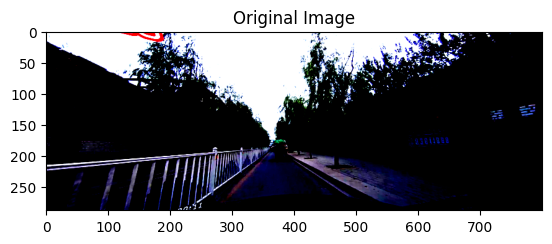

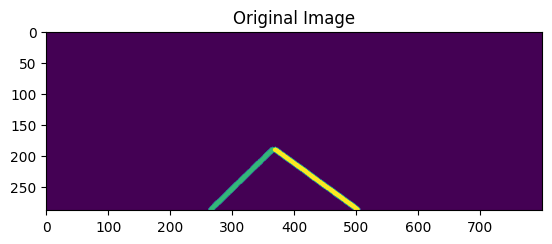

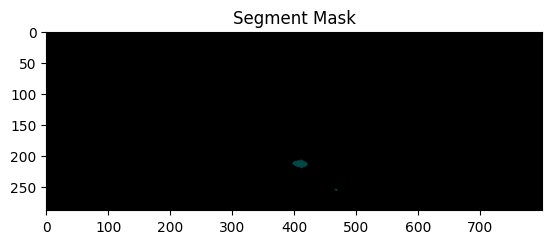

Epoch : 0 Mean Seg Loss : 0.25837 Mean Exist Loss : 0.561106 Mean Total Loss : 0.314483 
Lane Line existing Probability :  [[0.5573446  0.88231385 0.876331   0.6151236 ]]


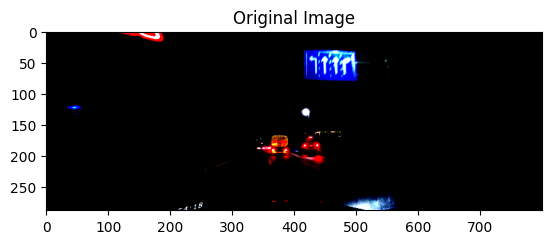

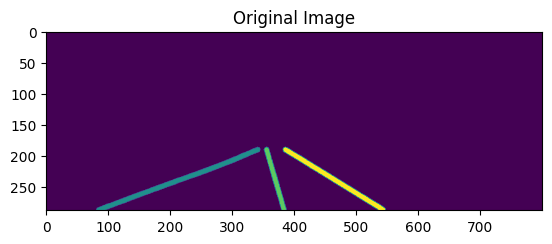

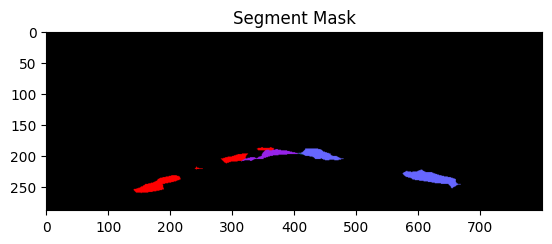

Epoch : 0 Mean Seg Loss : 0.24743 Mean Exist Loss : 0.554582 Mean Total Loss : 0.302893 
Lane Line existing Probability :  [[0.55693644 0.8922777  0.88613737 0.6319201 ]]


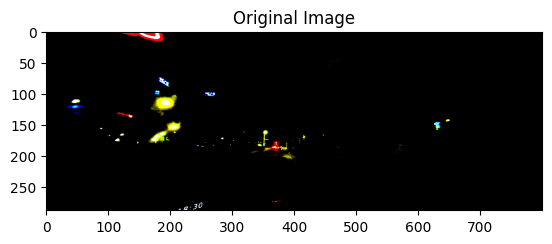

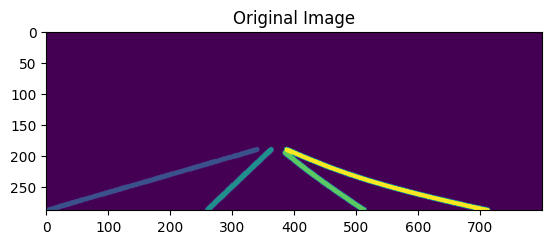

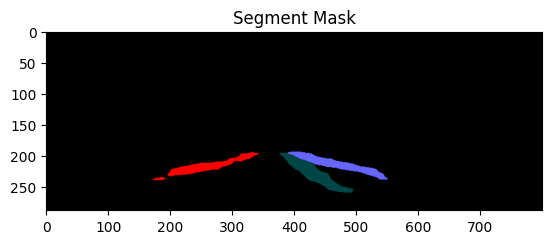

Epoch : 0 Mean Seg Loss : 0.23826 Mean Exist Loss : 0.549975 Mean Total Loss : 0.293255 
Lane Line existing Probability :  [[0.55967337 0.8897342  0.88429964 0.62386864]]


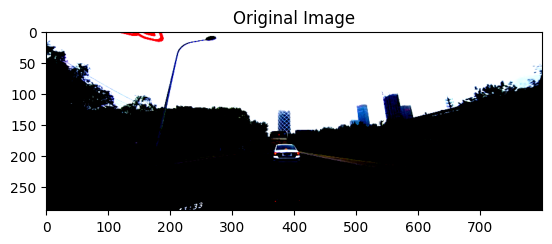

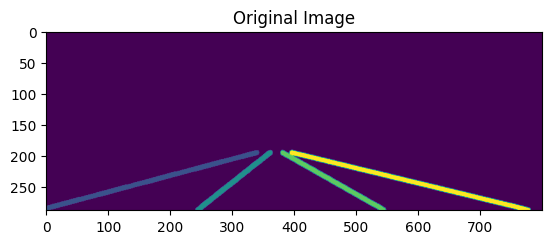

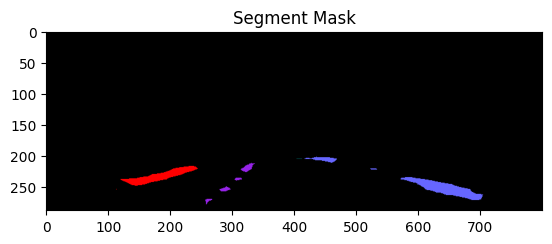

Epoch : 0 Mean Seg Loss : 0.23705 Mean Exist Loss : 0.549718 Mean Total Loss : 0.292027 
Epoch : 1 Mean Seg Loss : 0.16257 Mean Exist Loss : 0.495037 Mean Total Loss : 0.212072 
Lane Line existing Probability :  [[0.5992261  0.8935265  0.88208824 0.64503   ]]


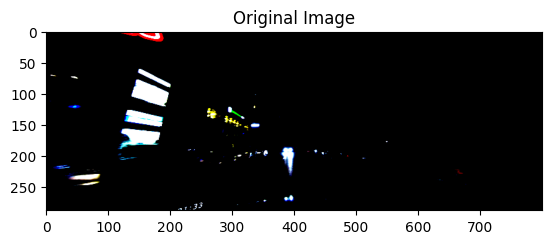

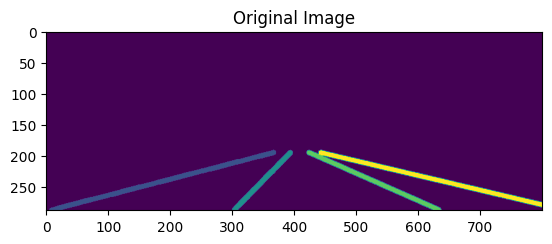

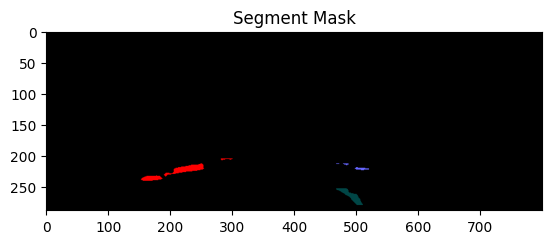

In [ ]:
from collections import deque
#define the train method
EPOCHS = 3
mean_loss        = deque(maxlen=100)
mean_seg_loss    = deque(maxlen=100)
mean_exist_loss  = deque(maxlen=100)
mean_vtotal_loss = deque(maxlen=100)
mean_vseg_loss   = deque(maxlen=100)
mean_vexist_loss = deque(maxlen=100)
for epoch in range(EPOCHS):
    e_loss_seg = 0
    e_loss_exist = 0
    e_loss_total =0
    ev_loss_seg =0
    ev_loss_exist =0
    ev_loss_total=0
    epoch_counter = 0
    for sample in train_loader :
        img_data = sample['data'].to(device)
        label_data = sample['target'].to(device)
        exist = sample['exist'].to(device)
        epoch_counter += 1
        seg_pred , exist_pred  , loss_seg , loss_exist , total_loss = scnn_net.forward(img_data , label_data , exist)
        #cumulate the losses
        e_loss_seg += loss_seg.to('cpu').detach().item()
        e_loss_exist  += loss_exist.to('cpu').detach().item()
        e_loss_total += total_loss.to('cpu').detach().item()
        #optimize the model
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        scheduler.step()
        if((epoch_counter+1)%100==0):
            print("Epoch : {} Mean Seg Loss : {:.5f} Mean Exist Loss : {:.6f} Mean Total Loss : {:.6f} ".format(epoch , 
                                                                                                        e_loss_seg/epoch_counter ,
                                                                                                       e_loss_exist/epoch_counter,
                                                                                                       e_loss_total/epoch_counter))
            rand_int = np.random.choice(np.arange(len(img_data)))
            rand_img = img_data[rand_int].unsqueeze(0)
            label = label_data[rand_int].squeeze(0)
            seg_pred , exist_pred , _ , _ , _ = scnn_net.forward(rand_img)
            ori_img = rand_img.to('cpu').detach().numpy()
            seg_pred = seg_pred.to('cpu').detach().numpy()
            exist_pred = exist_pred.to('cpu').detach().numpy()
            label = label.to('cpu').detach().numpy()
            plot_results(ori_img , seg_pred , exist_pred , label)
            
            
        
    mean_seg_loss.append(e_loss_seg/len(train_loader))
    mean_exist_loss.append(e_loss_exist/len(train_loader))
    mean_loss.append(e_loss_total/len(train_loader))
    
    #validation data evaluation
    if((epoch+1)%5==0):
        scnn_net.eval()
        with torch.no_grad():
            for sample in valid_loader :
                img_data = sample['data'].to(device)
                label_data = sample['target'].to(device)
                exist = sample['exist'].to(device)

                seg_pred , exist_pred , loss_seg , loss_exist , loss_total = scnn_net.forward(img_data , label_data , exist)

                ev_loss_seg += loss_seg.to('cpu').detach().item()
                ev_loss_exist += loss_exist.to('cpu').detach().item()
                ev_loss_total += loss_total.to('cpu').detach().item()

            mean_vseg_loss.append(ev_loss_seg/len(valid_loader))   
            mean_vexist_loss.append(ev_loss_exist/len(valid_loader))
            mean_vtotal_loss.append(ev_loss_total/len(valid_loader))

            #take a random sample from image
            rand_int = np.random.choice(np.arange(len(img_data)))
            rand_img = img_data[rand_int].unsqueeze(0)
            seg_pred , exist_pred , _ , _ , _ = scnn_net.forward(rand_img)
            ori_img = rand_img.to('cpu').detach().numpy()
            seg_pred = seg_pred.to('cpu').detach().numpy()
            exist_pred = exist_pred.to('cpu').detach().numpy()

            plot_results(ori_img , seg_pred , exist_pred)

        #convert model to train mode
        scnn_net.train()
        print("Validation Results")
        print("Epoch : {} Mean Seg Loss : {:.5f} Mean Exist Loss : {:.6f} Mean Total Loss : {:.6f} ".format(epoch , 
                                                                                                        np.mean(mean_vseg_loss) ,
                                                                                                       np.mean(mean_vexist_loss),
                                                                                                       np.mean(mean_vtotal_loss)))
    else:
        print("Epoch : {} Mean Seg Loss : {:.5f} Mean Exist Loss : {:.6f} Mean Total Loss : {:.6f} ".format(epoch , 
                                                                                                        np.mean(mean_seg_loss) ,
                                                                                                       np.mean(mean_exist_loss),
                                                                                                       np.mean(mean_loss)))
